In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

import acquire as acq
import prepare as prep

from sklearn.ensemble import RandomForestClassifier

In [4]:
t_train, t_validate, t_test = prep.get_prep_split_titanic()

In [6]:
t_train.survived.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [5]:
baseline_accuracy = 329 / 534
t_train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,male,0,0,7.8958,C,1,1,0,0
380,380,1,1,female,0,0,227.5250,C,1,0,0,0
492,492,0,1,male,0,0,30.5000,S,1,1,0,1
55,55,1,1,male,0,0,35.5000,S,1,1,0,1
243,243,0,3,male,0,0,7.1250,S,1,1,0,1


In [7]:
target = "survived"

In [9]:
x_train = t_train.drop(columns=["survived", "sex", "passenger_id", "embarked"])

x_train.head()

y_train = t_train[target]

y_train.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

In [10]:
# validate 
x_validate = t_validate.drop(columns=["survived", "sex", "passenger_id", "embarked"])

y_validate = t_validate[target]

# test
x_test = t_test.drop(columns=["survived", "sex", "passenger_id", "embarked"])

y_test = t_test[target]

In [12]:
rf = RandomForestClassifier()
rf

RandomForestClassifier()

In [15]:
rf.fit(x_train, y_train)
rf.score(x_train, y_train)

0.9456928838951311

In [16]:
rf.score(x_validate, y_validate)

0.7528089887640449

In [17]:
rf.feature_importances_

array([0.10018887, 0.06626304, 0.05009539, 0.40102695, 0.02356432,
       0.30993572, 0.0160659 , 0.0328598 ])

In [18]:
x_train.columns

Index(['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male', 'embarked_Q',
       'embarked_S'],
      dtype='object')

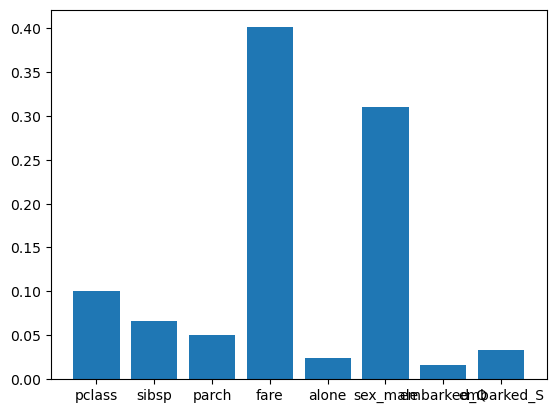

In [24]:
plt.bar(x_train.columns, rf.feature_importances_);

In [35]:
trees = RandomForestClassifier(random_state=123, max_depth=3)
trees.fit(x_train, y_train)
trees.score(x_train, y_train)
trees.predict(x_train)
y_pred = trees.predict(x_train)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [36]:
conf = confusion_matrix(y_train, y_pred)
conf

array([[305,  24],
       [ 70, 135]])

In [37]:
labels = sorted(y_train.unique())
labels

[0, 1]

In [40]:
#make pretty with df
pd.DataFrame(conf,
            index=[f"{label} _actual" for label in labels],
            columns=[f"{label} _predict" for label in labels])

,0 _predict,1 _predict
0 _actual,305,24
1 _actual,70,135


In [41]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       329
           1       0.85      0.66      0.74       205

    accuracy                           0.82       534
   macro avg       0.83      0.79      0.80       534
weighted avg       0.83      0.82      0.82       534



In [43]:
trees.score(x_validate, y_validate)

0.8033707865168539